<a href="https://colab.research.google.com/github/gennachiaro/ora-MELTS/blob/testing/Copy_of_MELTS_Curves_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Rhyolite-MELTS Curves

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import PathCollection
import glob
import os
from PIL import Image
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
from IPython import display

# Specify Sample Name and Population

In [ ]:
sample = 'ORA-5B-407'
population = 'VCCR' # selects which excel sheet to get compositional data from

# Import Excel Files

## Get Data File Names

In [ ]:
# # DON'T RUN WITH CO LAB BECAUSE THIS IS A PATH ON MY COMPUTER, NEED TO FIGURE OUT WORKING DIRECTORIES AND SUCH

# # Path to folder with Rhyolite-MELTS simulations
# path =r'/Users/gennachiaro/Dropbox/Rhyolite-MELTs/All_Corrected_AlterationSims_0.5-3.0K2O_WithNonZeroMnO/'
# filenames = glob.glob(path + sample + '/*.xlsm') #selects files for our chosen sample
# filenames = sorted(filenames)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# For running in google colab, trying it out with packaging the files along with this notebook as a test
path = r'/content/'
filenames = glob.glob(path + sample + '*.xlsm') #selects files for our chosen sample
filenames = sorted(filenames)
print(filenames)

['/content/ORA-5B-407-AVG+0.0-MELTS_Auto.xlsm', '/content/ORA-5B-407-AVG+0.5-MELTS_Auto.xlsm', '/content/ORA-5B-407-AVG+1.0-MELTS_Auto.xlsm', '/content/ORA-5B-407-AVG+1.5-MELTS_Auto.xlsm', '/content/ORA-5B-407-AVG+2.0-MELTS_Auto.xlsm', '/content/ORA-5B-407-AVG+2.5-MELTS_Auto.xlsm', '/content/ORA-5B-407-AVG+3.0-MELTS_Auto.xlsm', '/content/ORA-5B-407-AVG+3.5-MELTS_Auto.xlsm', '/content/ORA-5B-407-AVG+4.0-MELTS_Auto.xlsm', '/content/ORA-5B-407-AVG+4.5-MELTS_Auto.xlsm']


## Loop Through Excel Files and Create Master Dataframe

In [ ]:
# First create dataframes to store data
plagioclase_all = pd.DataFrame()
sanidine_all = pd.DataFrame()
quartz_all = pd.DataFrame()

In [ ]:
# Then run loop to get all of the information from the excel files
for filename in filenames:
    print(filename)

    # read the file into a pandas dataframe and assign it to a variable
    temp = pd.read_excel(filename, sheet_name = ['plagioclase', 'sanidine', 'quartz'], usecols = ('Index', 'T (C) ', 'P (MPa)'))

    # extract the last folder name in pathname
    basename = os.path.basename(filename)
    basename

    # simulation name in format "0.5" for dataframe slicing later on
    basename = basename.replace(sample + '-AVG+', '')
    basename = basename.replace('-MELTS_Auto.xlsm', '')
    #print(basename)

    # create seperate dataframe for each mineral phase
    plagioclase = temp['plagioclase']
    sanidine = temp['sanidine']
    quartz = temp['quartz']

    # read in simulation name into a column for each of the dataframes 
    plagioclase['Simulation'] = basename
    sanidine['Simulation'] = basename
    quartz['Simulation'] = basename

    # create a column which specifies the phase
    plagioclase['Phase'] = str('plagioclase')
    sanidine['Phase'] = str('sanidine')
    quartz['Phase'] = str('quartz')

    # append the data to an existing dataframe so it is not overwritten
    plagioclase_all = plagioclase_all.append(plagioclase)
    sanidine_all = sanidine_all.append(sanidine)
    quartz_all = quartz_all.append(quartz)

# create a master dataframe for all of the data 
all_phases = pd.DataFrame()

# append all dataframes to master dataframe
dataframes = [plagioclase_all, sanidine_all, quartz_all] # list of all dataframes
for i in dataframes:
    all_phases = all_phases.append(i)

/content/ORA-5B-407-AVG+0.0-MELTS_Auto.xlsm
/content/ORA-5B-407-AVG+0.5-MELTS_Auto.xlsm
/content/ORA-5B-407-AVG+1.0-MELTS_Auto.xlsm
/content/ORA-5B-407-AVG+1.5-MELTS_Auto.xlsm
/content/ORA-5B-407-AVG+2.0-MELTS_Auto.xlsm
/content/ORA-5B-407-AVG+2.5-MELTS_Auto.xlsm
/content/ORA-5B-407-AVG+3.0-MELTS_Auto.xlsm
/content/ORA-5B-407-AVG+3.5-MELTS_Auto.xlsm
/content/ORA-5B-407-AVG+4.0-MELTS_Auto.xlsm
/content/ORA-5B-407-AVG+4.5-MELTS_Auto.xlsm


# Get Original Composition of Sample

In [ ]:
# Specify pathname for google colab since my script just grabs the file on my computer
path2 = '/content/All_SEM_Corrected_Stats_Final.xlsx'
path2 = os.path.normcase(path2) # This changes path to be compatible with windows


In [ ]:
# # specify pathname
# path2 = '/Users/gennachiaro/Documents/vanderbilt/research/ora caldera/SEM-data/All_SEM_Corrected_Stats_Final.xlsx'
# path2 = os.path.normcase(path2) # This changes path to be compatible with windows

# import SEM Stats
majors = pd.read_excel(path2, sheet_name = population , index_col=1)
composition = majors.loc[sample] #slice so only print the composition of chosen sample
print(composition)

# slice dataframe so you just print the K2O wt. %
K2O = composition.loc['K2O']
formatted_string = "{:.2f}".format(K2O) #format to two decimal points
K2O = float(formatted_string)
print(K2O)

# subtract by 0.5 K2O so the forloop (which adds +0.5 with each iteration) starts at the original composition
K2O = K2O - 0.5

Name             ORA-5B-407-HSR-2019.09.20
Type                                   HSR
Population                          VCCR 2
Analysis Date                   2019.09.20
SiO2                               77.5356
Al2O3                              12.9087
TiO2                             0.0483252
MgO                              0.0486087
FeO                                1.00274
MnO                              0.0494355
CaO                               0.535645
Na2O                               4.74805
K2O                                3.12293
Total                                  100
A/CNK                              1.06138
Na + K                             7.87098
FeO/(FeO+MgO)                     0.954548
Count                                   29
Name: ORA-5B-407, dtype: object
3.12


# Set Up Plots

## Create New Folder to Save Plots To 

In [ ]:
# Saves Folder to Google COLAB

newpath = r'/content/'+ sample + "_MELTS_Curves_ForLoopTest2" 
if not os.path.exists(newpath):
    os.makedirs(newpath)

location = '/content/'+ sample + "_MELTS_Curves_ForLoopTest2/" # Name of folder for easy reference later

In [ ]:
# # Ignore this because it sets it up to my desktop for now
# newpath = r'/Users/gennachiaro/Desktop/'+ sample + "_MELTS_Curves_ForLoopTest2" 
# if not os.path.exists(newpath):
#     os.makedirs(newpath)

# location = '/Users/gennachiaro/Desktop/'+ sample + "_MELTS_Curves_ForLoopTest2/" # Name of folder for easy reference later

## Plotting For Loop

(50.0, 300.0)

(730.0, 810.0)

Text(0.5, 1.0, 'ORA-5B-407 + 0.0 K2O')

Text(55, 732.75, '3.12 wt. % K2O')

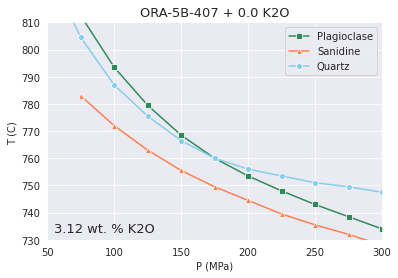

(50.0, 300.0)

(730.0, 810.0)

Text(0.5, 1.0, 'ORA-5B-407 + 0.5 K2O')

Text(55, 732.75, '3.62 wt. % K2O')

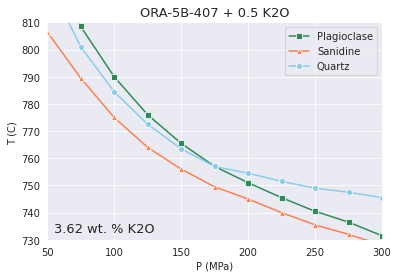

(50.0, 300.0)

(730.0, 810.0)

Text(0.5, 1.0, 'ORA-5B-407 + 1.0 K2O')

Text(55, 732.75, '4.12 wt. % K2O')

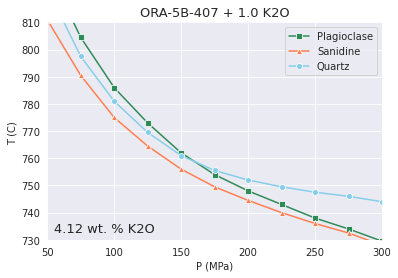

(50.0, 300.0)

(730.0, 810.0)

Text(0.5, 1.0, 'ORA-5B-407 + 1.5 K2O')

Text(55, 732.75, '4.62 wt. % K2O')

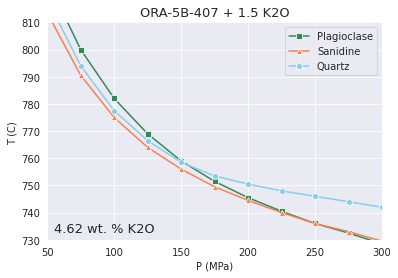

(50.0, 300.0)

(730.0, 810.0)

Text(0.5, 1.0, 'ORA-5B-407 + 2.0 K2O')

Text(55, 732.75, '5.12 wt. % K2O')

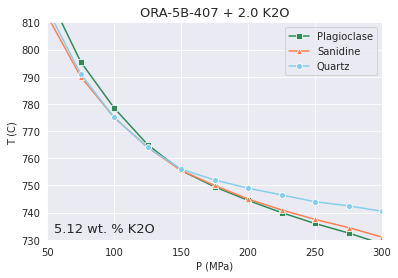

(50.0, 300.0)

(730.0, 810.0)

Text(0.5, 1.0, 'ORA-5B-407 + 2.5 K2O')

Text(55, 732.75, '5.62 wt. % K2O')

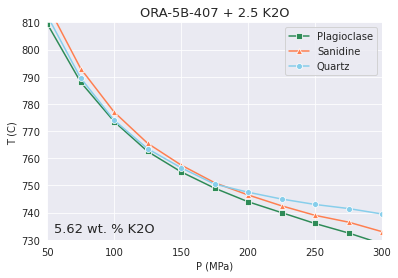

(50.0, 300.0)

(730.0, 810.0)

Text(0.5, 1.0, 'ORA-5B-407 + 3.0 K2O')

Text(55, 732.75, '6.12 wt. % K2O')

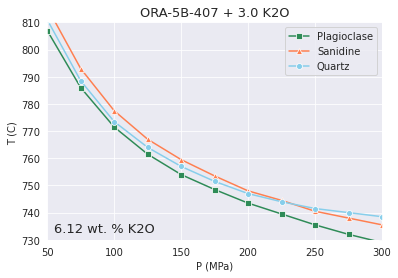

(50.0, 300.0)

(730.0, 810.0)

Text(0.5, 1.0, 'ORA-5B-407 + 3.5 K2O')

Text(55, 732.75, '6.62 wt. % K2O')

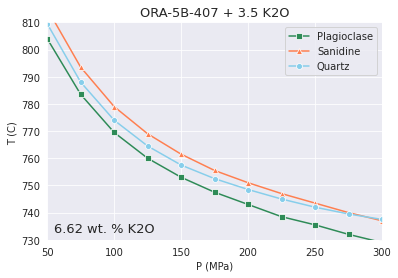

(50.0, 300.0)

(730.0, 810.0)

Text(0.5, 1.0, 'ORA-5B-407 + 4.0 K2O')

Text(55, 732.75, '7.12 wt. % K2O')

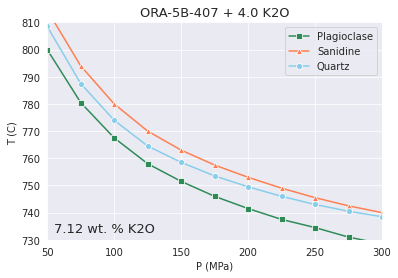

(50.0, 300.0)

(730.0, 810.0)

Text(0.5, 1.0, 'ORA-5B-407 + 4.5 K2O')

Text(55, 732.75, '7.62 wt. % K2O')

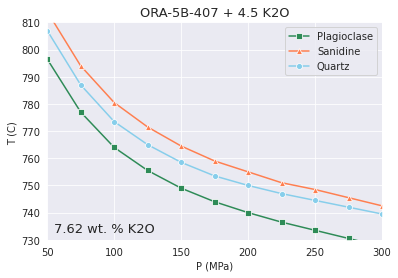

<Figure size 432x288 with 0 Axes>

In [ ]:
# Set background color
sns.set_style("darkgrid") 

run = ['0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5']

for i in run:
    run = i
    K2O = K2O + 0.5 # update K2O value for each run
    #print (K2O)
    simulation = sample + '+' + run

    #slice allphases dataframe
    iteration = all_phases[all_phases['Simulation'].isin([run])]

    plag = iteration[iteration['Phase'].isin(['plagioclase'])]
    san = iteration[iteration['Phase'].isin(['sanidine'])]
    quartz = iteration[iteration['Phase'].isin(['quartz'])]

    # Create plot
    plt.xlim([50, 300])
    plt.ylim([730, 810])

    plot = sns.lineplot(data=plag, x='P (MPa)', y='T (C) ',
                        legend="brief", label='Plagioclase', ci=None, marker='s', color = 'seagreen')
    plot = sns.lineplot(data=san, x='P (MPa)', y='T (C) ',
                        legend="brief", label='Sanidine', ci=None, marker='^', color = 'coral')
    plot = sns.lineplot(data=quartz, x='P (MPa)', y='T (C) ',
                        legend="brief", label='Quartz', ci=None, marker='o', color = 'skyblue')

    plot.set_title(sample + " + " + run + " K2O", fontsize=13)
    plt.text(55,732.75, str(K2O) + ' wt. % K2O', fontsize = 13)
    plt.savefig(location + simulation + '.png', dpi=300)
    plt.show()
    plt.clf()

# Make GIF

In [ ]:
# create the frames
frames = []
imgs = glob.glob(location + '*.png')
imgs.sort()

for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

spot = location + sample + '.gif'
# Save into a GIF file that loops forever
frames[0].save(spot, format='GIF',
                append_images = frames[1:],
                save_all = True,
                duration = 700, loop = 0)

# Show GIF

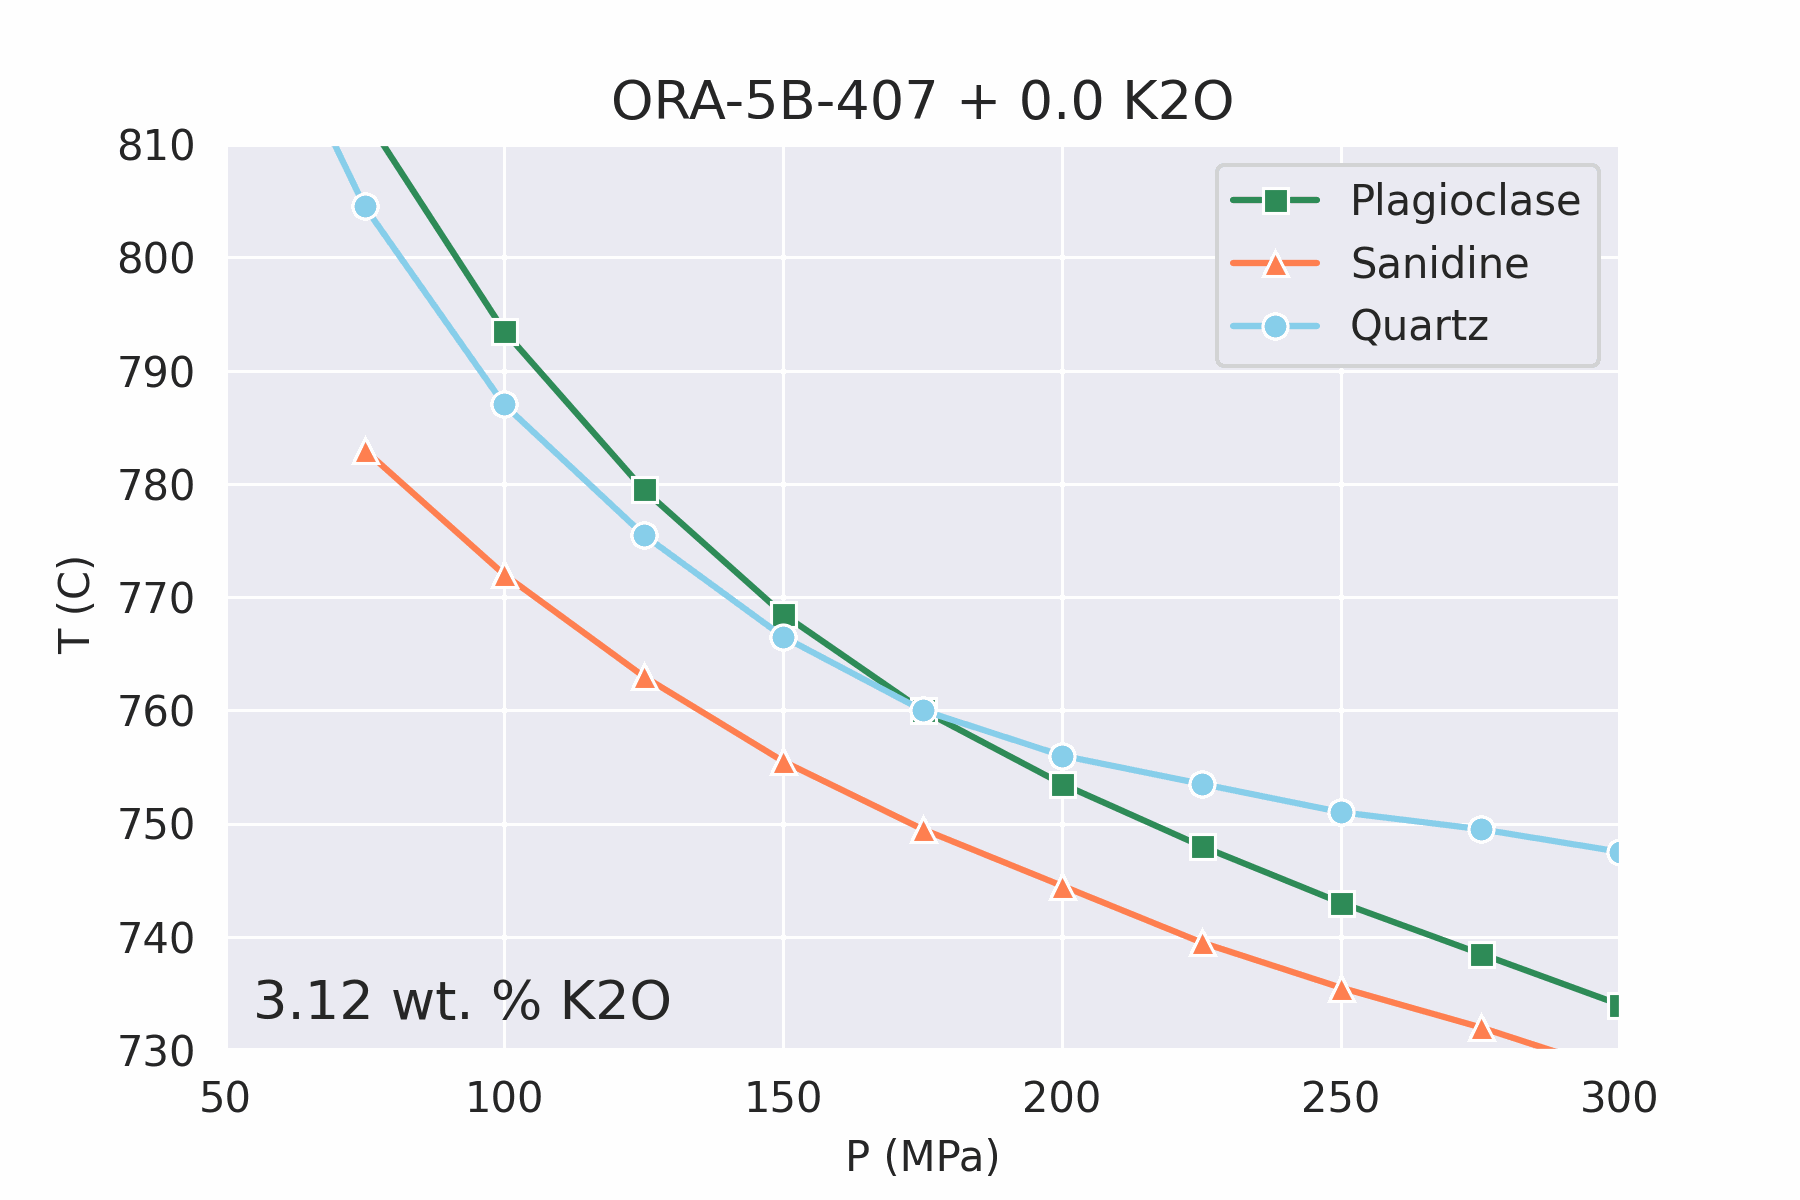

In [ ]:
# Location of GIF
gifPath = spot 

# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')